In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

path = '../data/line_4/'
file = 'F_2_L45.I_S5209MI'
fileb = 'F_2_L45.I_S5209bMI'
filev = 'F_2_L45.I_S5202F02S01'
filei = 'F_2_L45.I_S5202F02I'
def loadData(path,file_name):
    alldata = []
    for i in os.listdir('../data/line_4'):
        
        path2 = path + i + '/' + i + '_' + file_name + '.txt'
        print(path2)
        f = open(path2) 
        data = json.load(f)
        alldata.extend(data[file_name])
    return alldata

In [2]:
t = loadData(path,file)
tb = loadData(path,fileb)
tv = loadData(path,filev)
ti = loadData(path,filei)

../data/line_4/20180414/20180414_F_2_L45.I_S5209MI.txt
../data/line_4/20180421/20180421_F_2_L45.I_S5209MI.txt
../data/line_4/20180428/20180428_F_2_L45.I_S5209MI.txt
../data/line_4/20180505/20180505_F_2_L45.I_S5209MI.txt
../data/line_4/20180512/20180512_F_2_L45.I_S5209MI.txt
../data/line_4/20180519/20180519_F_2_L45.I_S5209MI.txt
../data/line_4/20180526/20180526_F_2_L45.I_S5209MI.txt
../data/line_4/20180602/20180602_F_2_L45.I_S5209MI.txt
../data/line_4/20180609/20180609_F_2_L45.I_S5209MI.txt
../data/line_4/20180616/20180616_F_2_L45.I_S5209MI.txt
../data/line_4/20180623/20180623_F_2_L45.I_S5209MI.txt
../data/line_4/20180630/20180630_F_2_L45.I_S5209MI.txt
../data/line_4/20180707/20180707_F_2_L45.I_S5209MI.txt
../data/line_4/20180714/20180714_F_2_L45.I_S5209MI.txt
../data/line_4/20180414/20180414_F_2_L45.I_S5209bMI.txt
../data/line_4/20180421/20180421_F_2_L45.I_S5209bMI.txt
../data/line_4/20180428/20180428_F_2_L45.I_S5209bMI.txt
../data/line_4/20180505/20180505_F_2_L45.I_S5209bMI.txt
../dat

In [3]:
data_t = pd.DataFrame(t)
data_tb = pd.DataFrame(tb)
data_tv = pd.DataFrame(tv)
data_ti = pd.DataFrame(ti)

In [4]:
data_t.value = pd.to_numeric(data_t.value, errors='ignore')
data_tb.value = pd.to_numeric(data_tb.value,errors = 'ignore')
data_tv.value = pd.to_numeric(data_tv.value,errors = 'ignore')
data_ti.value = pd.to_numeric(data_ti.value,errors = 'ignore')

data_t = data_t[data_t['value']> 0]
data_tb = data_tb[data_tb['value'] > 0]
data_tv = data_tv[data_tv['value'] > 0]
data_ti = data_ti[data_ti['value'] > 0]

In [5]:
new_ts_t = [data_t['ts'].iloc[i][0:13] for i in range(0,len(data_t))]
new_ts_tb = [data_tb['ts'].iloc[i][0:13] for i in range(0,len(data_tb))]
new_ts_tv = [data_tv['ts'].iloc[i][0:13] for i in range(0,len(data_tv))]
new_ts_ti = [data_ti['ts'].iloc[i][0:13] for i in range(0,len(data_ti))]

In [6]:
data_t.drop('ts',axis=1, inplace=True)
data_tb.drop('ts',axis=1, inplace=True)
data_tv.drop('ts',axis=1, inplace=True)
data_ti.drop('ts',axis=1,inplace=True)

In [7]:
data_t.insert(1,'ts',new_ts_t)
data_tb.insert(1,'ts',new_ts_tb)
data_tv.insert(1,'ts',new_ts_tv)
data_ti.insert(1,'ts',new_ts_ti)

In [8]:
grouped_t = data_t['value'].groupby(data_t['ts'])
grouped_tb = data_tb['value'].groupby(data_tb['ts'])
grouped_tv = data_tv['value'].groupby(data_tv['ts'])
grouped_ti = data_ti['value'].groupby(data_ti['ts']) 

In [9]:
d1 = grouped_t.mean()
d2 = grouped_tb.mean()
d3 = grouped_tv.mean()
d4 = grouped_ti.mean()

In [10]:
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)
d4 = pd.DataFrame(d4)

In [11]:
data_3_4 = pd.merge(d3,d4,left_index= True, right_index=True)
data_all =  pd.merge(d1,data_3_4,left_index= True, right_index=True)

In [12]:
data_all.head()

,value,value_x,value_y
ts,,,
2018-04-14 08,129.998389,1477.919096,100.478163
2018-04-14 09,130.183292,1059.822500,100.582652
2018-04-14 10,132.322917,1087.213807,100.514692
2018-04-14 11,132.854250,1101.446881,100.236678
2018-04-14 12,132.152613,1276.358156,100.723549


In [13]:
mul = data_all.value_x * data_all.value_y
mul = pd.DataFrame(mul)

In [14]:
data_all.insert(1,'multiply',mul)

Text(0, 0.5, 'F_1_L1.I_5202F02I_mean_value')

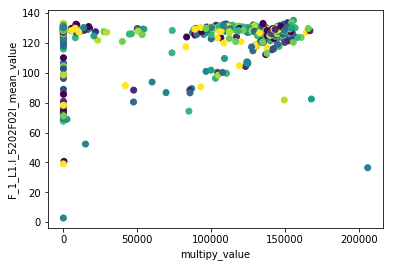

In [15]:
#电流a与转速 * 负荷
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['multiply'],data_all['value'],c = c,marker = 'o')
plt.xlabel('multipy_value')
plt.ylabel('F_1_L1.I_5202F02I_mean_value')

Text(0, 0.5, 'F_1_L1.I_5209MI_mean_value')

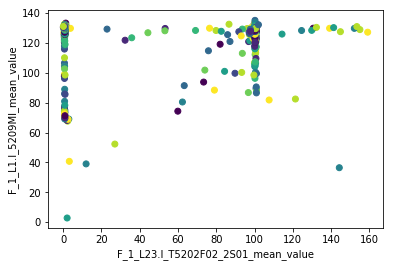

In [16]:
#电流a与负荷率反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_y'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2S01_mean_value')
plt.ylabel('F_1_L1.I_5209MI_mean_value')

Text(0, 0.5, 'F_1_L1.I_5209MI_mean_value')

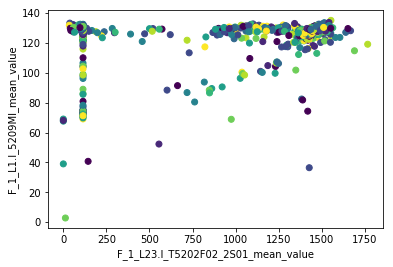

In [17]:
#电流a与转速
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_x'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2S01_mean_value')
plt.ylabel('F_1_L1.I_5209MI_mean_value')

In [18]:
data_3_4 = pd.merge(d3,d4,left_index= True, right_index=True)
data_all =  pd.merge(d2,data_3_4,left_index= True, right_index=True)

In [19]:
data_all.insert(1,'multiply',mul)

Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

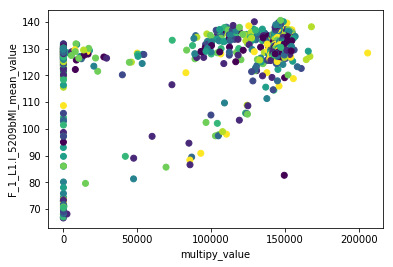

In [20]:
#电流b与转速 * 负荷
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['multiply'],data_all['value'],c = c,marker = 'o')
plt.xlabel('multipy_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')

Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

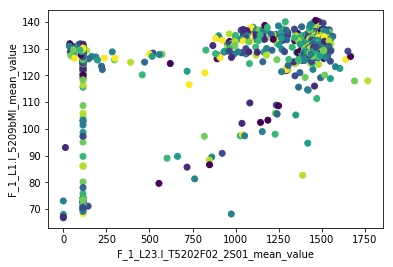

In [21]:
#电流b与转速反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_x'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2S01_mean_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')

Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

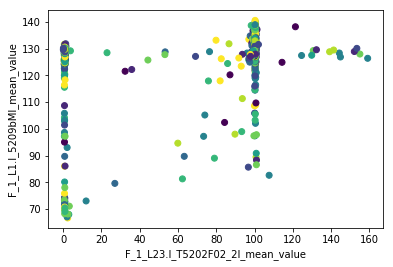

In [22]:
#电流b与负荷率反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_y'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2I_mean_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')